# Chapter 6: Iris & Moons

This notebook contains the code for chapter 6 of the Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow book.

In [1]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split
from sklearn.datasets import load_iris, make_moons
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.base import clone

from scipy.stats import mode
from graphviz import Source
import numpy as np

## Global configuration

In [2]:
IMAGE_PATH = "../images/"

RANDOM_SEED = 42

JOB_COUNT = 3

In [3]:
np.random.seed(RANDOM_SEED)

## Load <ins>iris</ins> data

In [4]:
iris = load_iris()

## Split <ins>iris</ins> data

In [5]:
X, y = iris.data[:, 2:], iris.target

## Train <ins>decision tree classifier</ins> model

In [6]:
dtc_model = DecisionTreeClassifier(max_depth=2)

In [7]:
%%time
dtc_model.fit(X, y)

CPU times: user 626 µs, sys: 0 ns, total: 626 µs
Wall time: 502 µs


DecisionTreeClassifier(max_depth=2)

## Visualize <ins>decision tree classifier</ins> model

In [8]:
export_graphviz(
    dtc_model,
    out_file=IMAGE_PATH + "iris-dtc-v0.1.0.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
)

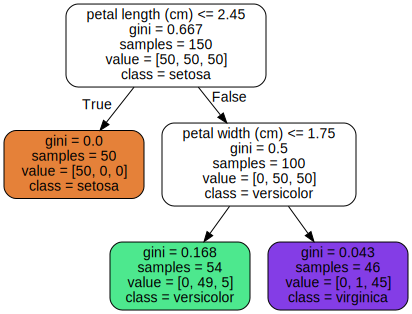

In [9]:
Source.from_file(IMAGE_PATH + "iris-dtc-v0.1.0.dot")

## Evaluate <ins>decision tree classifier</ins> model

In [10]:
dtc_model.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [11]:
dtc_model.predict([[5, 1.5]])

array([1])

## Generate <ins>quadratic</ins> data

In [12]:
m = 200

X = np.random.rand(m, 1)
y = (4 * (X - 0.5) ** 2) + np.random.randn(m, 1) / 10

## Train <ins>decision tree regression</ins> model

In [13]:
dtr_model = DecisionTreeRegressor(max_depth=2)

In [14]:
%%time
dtr_model.fit(X, y)

CPU times: user 364 µs, sys: 0 ns, total: 364 µs
Wall time: 381 µs


DecisionTreeRegressor(max_depth=2)

## Visualize <ins>decision tree regression</ins> model

In [15]:
export_graphviz(
    dtr_model,
    out_file=IMAGE_PATH + "quadratic-dtr-v0.1.0.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True,
)

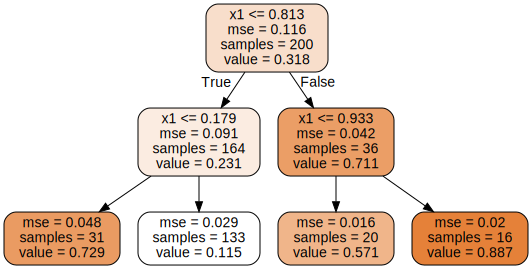

In [16]:
Source.from_file(IMAGE_PATH + "quadratic-dtr-v0.1.0.dot")

# Exercises

1. What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with 1 million instances?

**Solution**

The depth of a decision tree is equal to $\lfloor \log_2(m) \rfloor$, where $m$ is the amount of instances. So $\lfloor \log_2(10^6) \rfloor \approx 20$

2. Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?

**Solution**

A node's gini impurity is generally lower or greater than its parent's. It can happen that a nodes gini impurity is higher than its parent's, but for this to happen the gini impurity of the other child should be significantly lower.

3. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing `max_depth`?

**Solution**

Yes, since this hyperparameter will reduce the chance of the model overfitting the training set.

4. If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

**Solution**

No, because decision trees do not care if data is scaled or not.

5. If your training set contains 100,000 instances, will setting presort=True speed up training?

**Solution**

The presort option will only speed up training if the dataset is smaller than a few thousand instances.

6. Train and fine-tune a Decision Tree for the moons dataset.

a. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

**Solution**

In [17]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=RANDOM_SEED)

b. Split it into a training set and a test set using `train_test_split()`.

**Solution**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

c. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for `max_leaf_nodes`.

**Solution**

In [19]:
parameters = {
    "max_leaf_nodes": list(range(2, 100)),
    "min_samples_split": [2, 3, 4],
}

In [20]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_SEED), parameters, cv=3, n_jobs=JOB_COUNT)

In [21]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 201 ms, sys: 35.7 ms, total: 236 ms
Wall time: 3.05 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=3,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [22]:
grid_search.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

d. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

**Solution**

In [23]:
%%time
y_test_predictions = grid_search.predict(X_test)

CPU times: user 458 µs, sys: 0 ns, total: 458 µs
Wall time: 340 µs


In [24]:
accuracy_score(y_test, y_test_predictions)

0.8695

7. Grow a forest.

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn’s `ShuffleSplit` class for this.

**Solution**

In [25]:
%%time
n_trees = 1000
n_instances = 100

mini_sets = []

shuffle_split = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=RANDOM_SEED)
for mini_train_index, mini_test_index in shuffle_split.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    
    mini_sets.append((X_mini_train, y_mini_train))

CPU times: user 115 ms, sys: 1.31 ms, total: 117 ms
Wall time: 115 ms


b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

**Solution**

In [26]:
%%time
forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_test_predictions = tree.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_test_predictions))

np.mean(accuracy_scores)

CPU times: user 926 ms, sys: 0 ns, total: 926 ms
Wall time: 924 ms


0.8054499999999999

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s `mode()` function for this). This gives you majority-vote predictions over the test set.

**Solution**

In [27]:
%%time
y_test_predictions = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    y_test_predictions[tree_index] = tree.predict(X_test)

CPU times: user 159 ms, sys: 0 ns, total: 159 ms
Wall time: 159 ms


In [28]:
y_test_predictions_majority_votes, n_votes = mode(y_test_predictions, axis=0)

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

**Solution**

In [29]:
accuracy_score(y_test, y_test_predictions_majority_votes.reshape([-1]))

0.872